In [152]:
import numpy as np # linear algebra
import pandas as pd
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from nltk.tokenize.treebank import TreebankWordDetokenizer
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.naive_bayes import MultinomialNB
import nltk
from nltk.stem import WordNetLemmatizer,PorterStemmer
from nltk.tokenize import word_tokenize
from wordcloud import WordCloud, STOPWORDS
from nltk.corpus import stopwords
from collections import  Counter
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
import re
# Visualization Libraries
import matplotlib.pyplot as plt
import seaborn as sns
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
sns.set()
# %matplotlib inline
from sklearn.pipeline import Pipeline
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score
import warnings
warnings.filterwarnings("ignore")
import sklearn

[nltk_data] Downloading package punkt to C:\Users\durga
[nltk_data]     prasad\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to C:\Users\durga
[nltk_data]     prasad\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to C:\Users\durga
[nltk_data]     prasad\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [153]:
bbc_text = pd.read_csv("C:/Users/durga prasad/Desktop/bbc-text.csv", encoding='latin1')
bbc_text=bbc_text.rename(columns = {'text': 'News_Headline'}, inplace = False)
bbc_text.head(5)

,category,News_Headline
0,tech,tv future in the hands of viewers with home th...
1,business,worldcom boss left books alone former worldc...
2,sport,tigers wary of farrell gamble leicester say ...
3,sport,yeading face newcastle in fa cup premiership s...
4,entertainment,ocean s twelve raids box office ocean s twelve...


In [154]:
bbc_text.category.unique()

array(['tech', 'business', 'sport', 'entertainment', 'politics',
       'weather'], dtype=object)

no.of samples in each category



<Axes: xlabel='count', ylabel='category'>

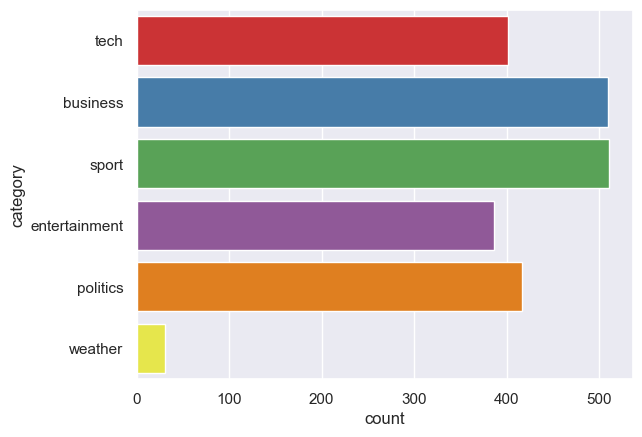

In [155]:
print('no.of samples in each category\n')
sns.countplot(bbc_text.category,palette='Set1')

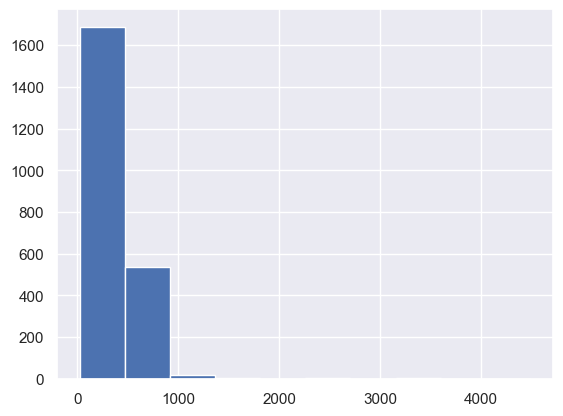

In [156]:
def word_count(text):
    text.str.split().\
    map(lambda x: len(x)).\
    hist()
word_count(bbc_text['News_Headline'])

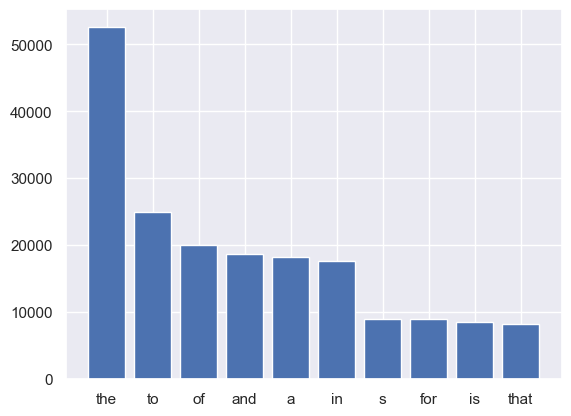

In [157]:
#stop words
def plot_stopwords(data):
    stop=set(stopwords.words('english'))
    data_split=data.str.split()
    data_list=data_split.values.tolist()
    corpus=[word for i in data_list for word in i]
    from collections import defaultdict
    dictionary_stopwords=defaultdict(int)
    for word in corpus:
        if word in stop:
            dictionary_stopwords[word]+=1

    top=sorted(dictionary_stopwords.items(),key=lambda x:x[1],reverse=True)[:10]
    x,y=zip(*top)
    plt.bar(x,y)
plot_stopwords(bbc_text['News_Headline'])

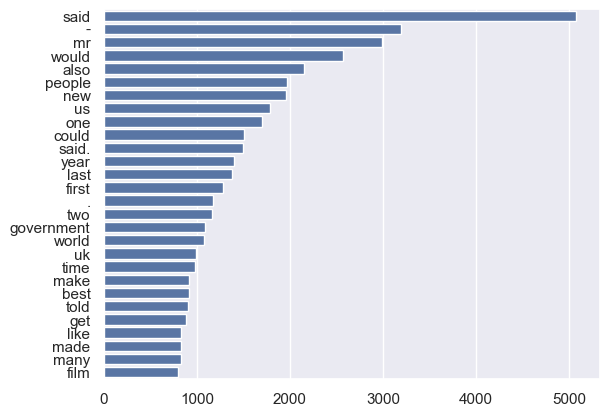

In [158]:
#frequent words
def top_frequent_words(data):
    stop=set(stopwords.words('english'))
    data_split=data.str.split()
    data_list=data_split.values.tolist()
    corpus=[word for i in data_list for word in i]
    counter=Counter(corpus)
    mostCommon = counter.most_common()
    x,y=[],[]
    for word,count in mostCommon[:100]:
        if (word not in stop):
            x.append(word)
            y.append(count)
    sns.barplot(x=y,y=x)
top_frequent_words(bbc_text['News_Headline'])

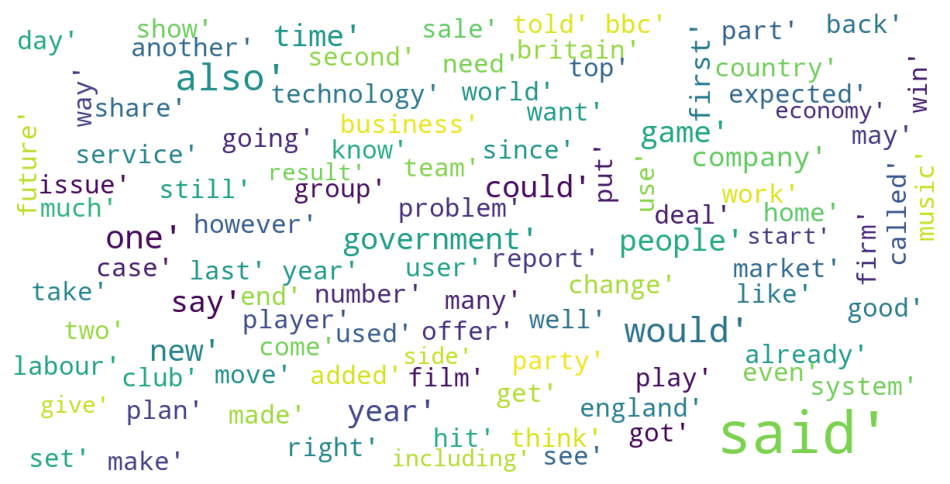

In [159]:
def plot_wordcloud(data):
    stop=set(stopwords.words('english'))
    def _preprocess_text(data):
        corpus=[]
        stem=PorterStemmer()
        lem=WordNetLemmatizer()
        for news in data:
            words=[w for w in word_tokenize(news) if (w not in stop)]
            words=[lem.lemmatize(w) for w in words if len(w)>2]

            corpus.append(words)
        return corpus
    corpus=_preprocess_text(data)
    wordcloud=WordCloud(
        background_color='white',
        stopwords=set(STOPWORDS),
        max_words=100,
        max_font_size=25,
        scale=3,
        random_state=1
    )

    wordcloud=wordcloud.generate(str(corpus))

    fig=plt.figure(1,figsize=(12,12))
    plt.axis('off')

    plt.imshow(wordcloud)
    plt.show()
plot_wordcloud(bbc_text['News_Headline'])


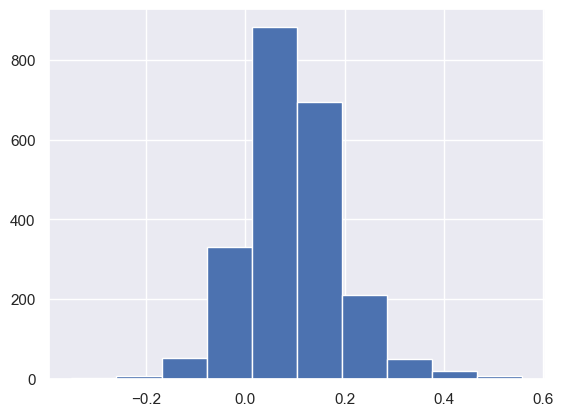

In [160]:
#Plot all headlines for positive negtaive and neutral semantics
from textblob import TextBlob
def polarity_histo(data):
    
    def check_semantics(data):
        return TextBlob(data).sentiment.polarity
        
    polarity_val =data.apply(lambda a : check_semantics(a))
    polarity_val.hist()
polarity_histo(bbc_text['News_Headline'])

In [161]:
# DATA CLEANING

def cleaning(bbc_text):
    if len(bbc_text)==1:
        str1=" "
        data_string=str1.join(bbc_text)
        word_tokens = data_string.split()
    #print(word_tokens))
    else:
        print('Wait! Data is getting cleaned...')
        # Tokenize : dividing Sentences into words
        bbc_text['text_clean'] = bbc_text['News_Headline'].apply(nltk.word_tokenize)
        print('Step 1-Tokenization Done!.')
        print(bbc_text.head(5))

    # Remove stop words
    if len(bbc_text)==1:
        stop_words = set(stopwords.words('english')) 
        filtered_sentence = [w for w in word_tokens if not w in stop_words] 
        filtered_sentence = []   
        for w in word_tokens: 
            if w not in stop_words: 
                filtered_sentence.append(w)
    else:
        stop_words=set(nltk.corpus.stopwords.words("english"))
        bbc_text['text_clean'] = bbc_text['text_clean'].apply(lambda x: [item for item in x if item not in stop_words])
        print('Step 2-All stop words are removed from the list.')
        print(bbc_text.head(5))
    #Will keep words and remove numbers and special characters
    if len(bbc_text)!=1:
        regex = '[a-z]+'
        bbc_text['text_clean'] = bbc_text['text_clean'].apply(lambda x: [char for char in x if re.match(regex, char)])
        print('Step3-Numbers and Special Characters are removed.')
        print(bbc_text.head(5))


In [162]:
print(len(bbc_text))
def detokenize(bbc_text):
  for i in range(len(bbc_text)):
    bbc_text_w = bbc_text['text_clean'][i]
    a=TreebankWordDetokenizer().detokenize(bbc_text_w)
    bbc_text.at[i,'text_clean']=a


2256


In [163]:
#Let's assigne numerical values to the unique categories
bbc_text.category = bbc_text.category.map({'tech':0, 'business':1, 'sport':2, 'entertainment':3, 'politics':4,'weather':5})
bbc_text.category.unique()

array([0, 1, 2, 3, 4, 5], dtype=int64)

In [164]:
#Check for all the null values if any
bbc_text.isnull().sum()

category         0
News_Headline    0
dtype: int64

In [165]:
#Let's split data into train and test
cleaning(bbc_text)
detokenize(bbc_text)
X = bbc_text.text_clean
y = bbc_text.category
#split data
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.6, random_state = 1)

Wait! Data is getting cleaned...
Step 1-Tokenization Done!.
   category                                      News_Headline  \
0         0  tv future in the hands of viewers with home th...   
1         1  worldcom boss  left books alone  former worldc...   
2         2  tigers wary of farrell  gamble  leicester say ...   
3         2  yeading face newcastle in fa cup premiership s...   
4         3  ocean s twelve raids box office ocean s twelve...   

                                          text_clean  
0  [tv, future, in, the, hands, of, viewers, with...  
1  [worldcom, boss, left, books, alone, former, w...  
2  [tigers, wary, of, farrell, gamble, leicester,...  
3  [yeading, face, newcastle, in, fa, cup, premie...  
4  [ocean, s, twelve, raids, box, office, ocean, ...  
Step 2-All stop words are removed from the list.
   category                                      News_Headline  \
0         0  tv future in the hands of viewers with home th...   
1         1  worldcom boss  left

In [166]:
vector = CountVectorizer(stop_words = 'english',lowercase=False)
# fit the vectorizer on the training data
vector.fit(X_train)
# print(len(vector.get_feature_names()))
vector.vocabulary_
X_transformed = vector.transform(X_train)
# print(X_transformed.toarray())
X_transformed.toarray()
# for test data
X_test_transformed = vector.transform(X_test)
print(X_test_transformed.toarray)

<bound method _cs_matrix.toarray of <903x22443 sparse matrix of type '<class 'numpy.int64'>'
	with 117200 stored elements in Compressed Sparse Row format>>


In [167]:
logistic_reg = LogisticRegression()
logistic_reg.fit(X_transformed, y_train)

LogisticRegression()

In [168]:
# fit
logistic_reg.fit(X_transformed,y_train)

# predict class
y_predicted = logistic_reg.predict(X_test_transformed)

# predict probabilities
y_pred_probability = logistic_reg.predict_proba(X_test_transformed)

In [169]:
# printing the overall accuracy
metrics.accuracy_score(y_test, y_predicted)

0.9789590254706534

In [170]:
confusion_mat = metrics.confusion_matrix(y_test, y_predicted)
print(confusion_mat)
TrueNeg = confusion_mat[0, 0]
TruePos = confusion_mat[1, 1]
FalseNeg = confusion_mat[1, 0]
FalsePos = confusion_mat[0, 1]
sensitivity = TruePos / float(FalseNeg + TruePos)
print("sensitivity",sensitivity)

specificity = TrueNeg / float(TrueNeg + FalsePos)
print("specificity",specificity)

[[156   1   3   1   0   0]
 [  1 200   0   0   3   0]
 [  0   2 206   0   1   0]
 [  0   1   1 150   0   0]
 [  2   3   0   0 159   0]
 [  0   0   0   0   0  13]]
sensitivity 0.9950248756218906
specificity 0.9936305732484076


In [171]:
PRECISION_SCORE = metrics.precision_score(y_test, y_predicted, average = 'micro')
RECALL_SCORE = metrics.recall_score(y_test, y_predicted, average = 'micro')
F1_SCORE =metrics.f1_score(y_test, y_predicted, average = 'micro')

print("PRECISION SCORE :",PRECISION_SCORE)
print("RECALL SCORE :",RECALL_SCORE)
print("F1 SCORE :",F1_SCORE)

PRECISION SCORE : 0.9789590254706534
RECALL SCORE : 0.9789590254706534
F1 SCORE : 0.9789590254706534


In [172]:
naivebayes = MultinomialNB()
naivebayes.fit(X_transformed, y_train)

MultinomialNB()

In [173]:
# fit
naivebayes.fit(X_transformed,y_train)
# predict class
y_predict = naivebayes.predict(X_test_transformed)
# predict probabilities
y_pred_probability = naivebayes.predict_proba(X_test_transformed)

In [174]:
# printing the overall accuracy
metrics.accuracy_score(y_test, y_predict)

0.973421926910299

In [175]:
metrics.confusion_matrix(y_test, y_predict)
# help(metrics.confusion_matrix)

confusion = metrics.confusion_matrix(y_test, y_predict)
print(confusion)
TrueNeg = confusion_mat[0, 0]
TruePos = confusion_mat[1, 1]
FalseNeg = confusion_mat[1, 0]
FalsePos = confusion_mat[0, 1]
sensitivity = TruePos / float(FalseNeg + TruePos)
print("sensitivity",sensitivity)

specificity = TrueNeg / float(TrueNeg + FalsePos)
print("specificity",specificity)

[[157   0   1   2   1   0]
 [  4 195   0   1   4   0]
 [  0   1 206   1   1   0]
 [  0   0   0 151   1   0]
 [  2   1   0   0 161   0]
 [  0   4   0   0   0   9]]
sensitivity 0.9950248756218906
specificity 0.9936305732484076


In [176]:
PRECISION_SCORE = metrics.precision_score(y_test, y_predicted, average = 'micro')
RECALL_SCORE = metrics.recall_score(y_test, y_predicted, average = 'micro')
F1_SCORE =metrics.f1_score(y_test, y_predicted, average = 'micro')

In [177]:
print("PRECISION SCORE :",PRECISION_SCORE)
print("RECALL SCORE :",RECALL_SCORE)
print("F1 SCORE :",F1_SCORE)

PRECISION SCORE : 0.9789590254706534
RECALL SCORE : 0.9789590254706534
F1 SCORE : 0.9789590254706534


In [178]:
headline1 = ['Morgan Wallen is a Billboard Music Awards finalist, but he wont be a part of the show']
vec1 = vector.transform(headline1).toarray()
print('Headline:' ,headline1)
print(str(list(naivebayes.predict(vec1))[0]).replace('0', 'TECH').replace('1', 'BUSINESS').replace('2', 'SPORTS').replace('3','ENTERTAINMENT').replace('4','POLITICS').replace('5','WEATHER'))



Headline: ['Morgan Wallen is a Billboard Music Awards finalist, but he wont be a part of the show']
SPORTS


In [179]:
relabel = {'0': 'tech', '1': 'business', '2': 'sport', '3': 'entertainment', '4': 'politics','5':'weather'}

In [180]:
headline2 = ['Intel to invest $600 million to expand chip, Mobileye R&D in Israel']
vec2 = vector.transform(headline2).toarray()
print('Headline:' ,headline2)
print(str(list(naivebayes.predict(vec2))[0]).replace('0', 'TECH').replace('1', 'BUSINESS').replace('2', 'SPORTS').replace('3','ENTERTAINMENT').replace('4','POLITICS').replace('5','WEATHER'))


Headline: ['Intel to invest $600 million to expand chip, Mobileye R&D in Israel']
BUSINESS


In [181]:
headline2 = ["The minimum temperature in the national capital on Thursday settled at 8.2 degrees Celsius, a notch below the season's average, according to the India Meteorological Department."]

vec2 = vector.transform(headline2).toarray()
print('Headline:' ,headline2)
print(str(list(naivebayes.predict(vec2))[0]).replace('0', 'TECH').replace('1', 'BUSINESS').replace('2', 'SPORTS').replace('3','ENTERTAINMENT').replace('4','POLITICS').replace('5','WEATHER'))


Headline: ["The minimum temperature in the national capital on Thursday settled at 8.2 degrees Celsius, a notch below the season's average, according to the India Meteorological Department."]
BUSINESS
